In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import tsfel

In [3]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)
y_train_df = pd.DataFrame(y_train, columns = ['Activity'])

**Question 1**

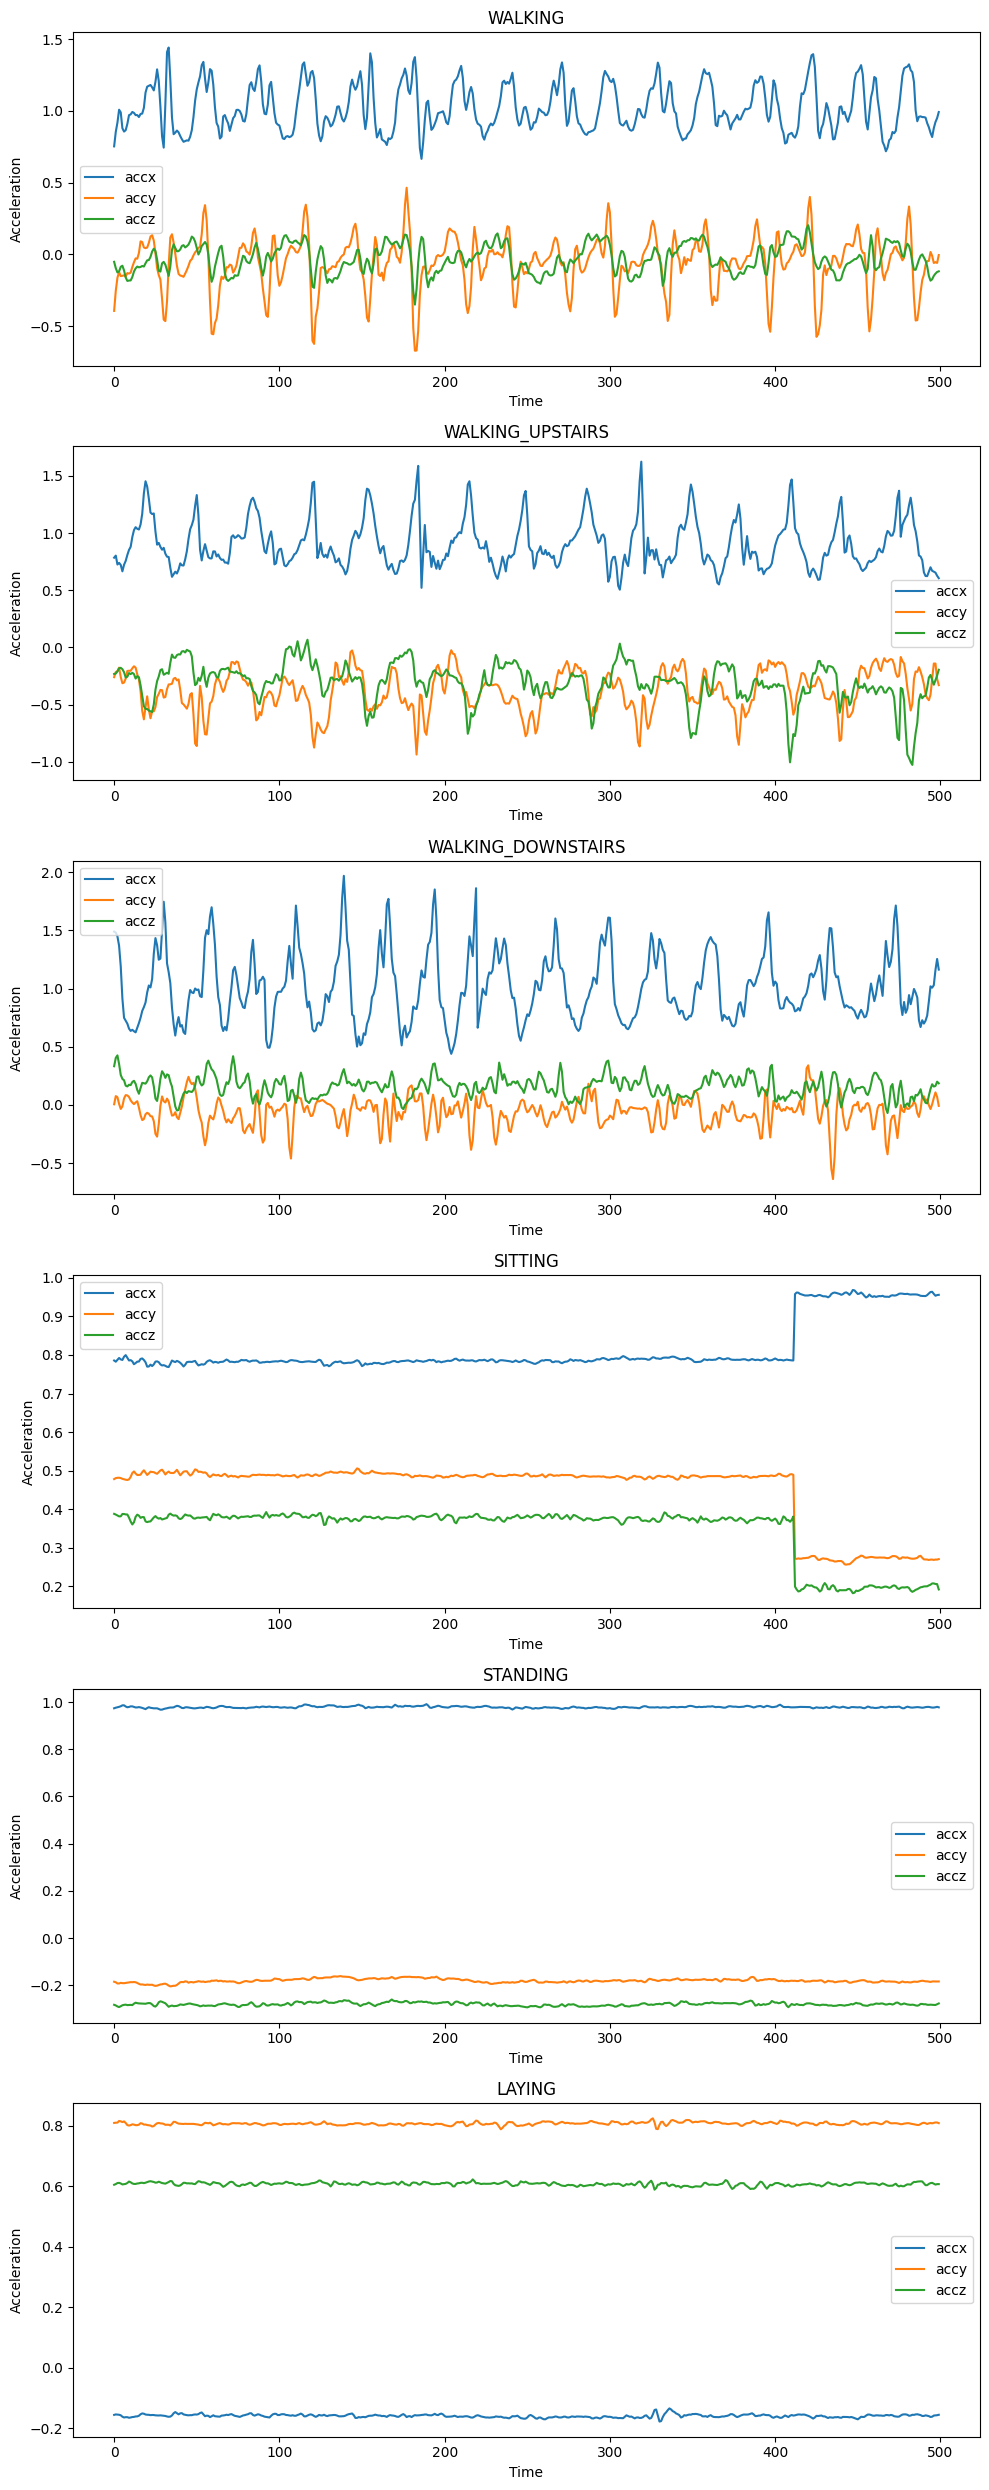

In [4]:
fig, axes = plt.subplots(6, 1, figsize = (10, 25))

for i in range(len(classes)):
    activity_index = np.where(y_train_df['Activity']==i+1)[0][0]
    
    time = np.arange(0, len(X_train[0][:, 0]))
    axes[i].set_title(list(classes.keys())[i])
    axes[i].plot(time, X_train[activity_index][:, 0], label='accx')
    axes[i].plot(time, X_train[activity_index][:, 1], label='accy')
    axes[i].plot(time, X_train[activity_index][:, 2], label='accz')
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Acceleration")
    axes[i].legend()
plt.tight_layout()


Yes, we can see a similarity between the static activities (laying, sitting, standing) in the component wise acceleration graphs that the values hover about a constant without much deviation with respect to time. Whereas, in the plots for the dynamic activities(walking, walking_downstairs, walking_upstairs), we can observe a lot of variations in the component wise acceleration values.

Yes, the model will be able to clearly classify the static activities from the dynamic activities but sub-classification among the two groups might show uncertainties due to the similar nature of their acceleration variations.

**Question 2**

Text(0.5, 1.0, 'Linear accelerations of different activities vs Time')

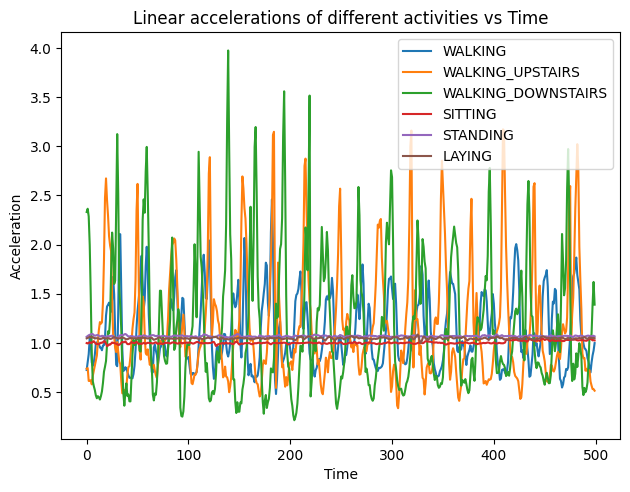

In [5]:
for i in range(len(classes)):
    activity_index = np.where(y_train_df['Activity']==i+1)[0][0]
    
    time = np.arange(0, len(X_train[0][:, 0]))
    linear_acc = np.sum(X_train[activity_index]**2, axis = 1)
    plt.plot(time, linear_acc, label=list(classes.keys())[i])
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.tight_layout()
plt.title('Linear accelerations of different activities vs Time')

No, we won’t need a machine learning model to differentiate between the broader groups (static and dynamic). This is based on the inference from the linear acceleration plot that we see an almost constant linear acceleration for the static activities, but the same varies over a much larger range for the dynamic activities.

**Question 3**

In [6]:
model = DecisionTreeClassifier()
model.fit(X_train_2d, y_train)

y_pred = model.predict(X_test_2d)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of this model is:", accuracy)

The accuracy of this model is: 0.5277777777777778


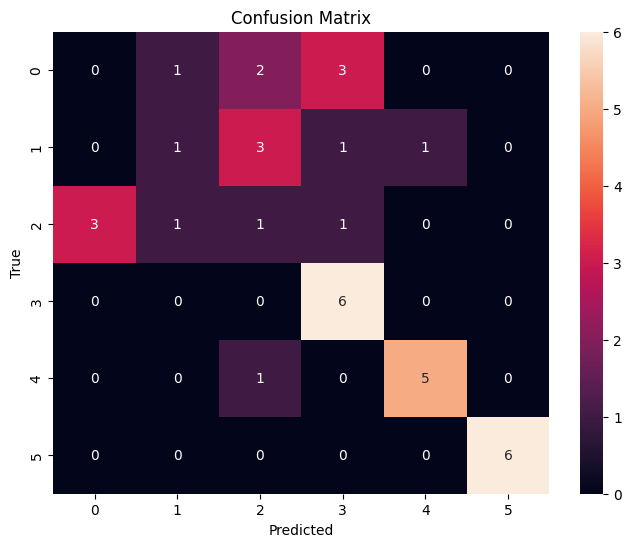

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Question 4**

The accuracy of the Decision Tree of depth 2 is 0.4444444444444444


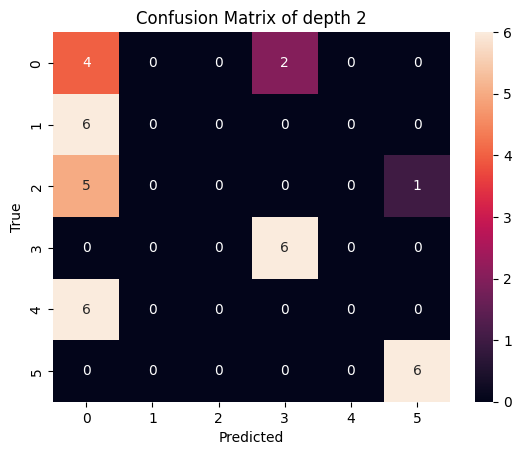

The accuracy of the Decision Tree of depth 3 is 0.6111111111111112


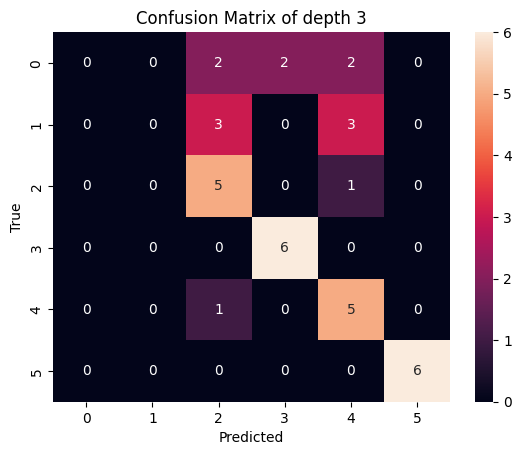

The accuracy of the Decision Tree of depth 4 is 0.6666666666666666


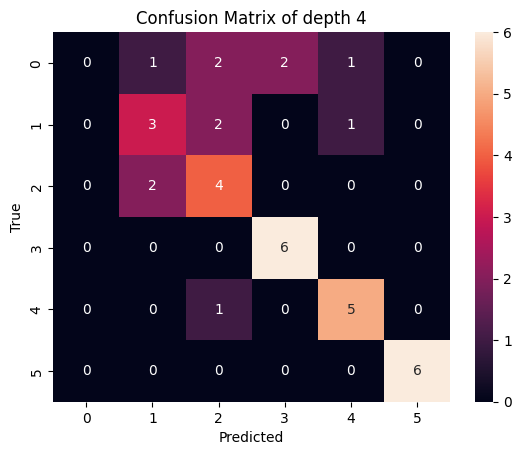

The accuracy of the Decision Tree of depth 5 is 0.6111111111111112


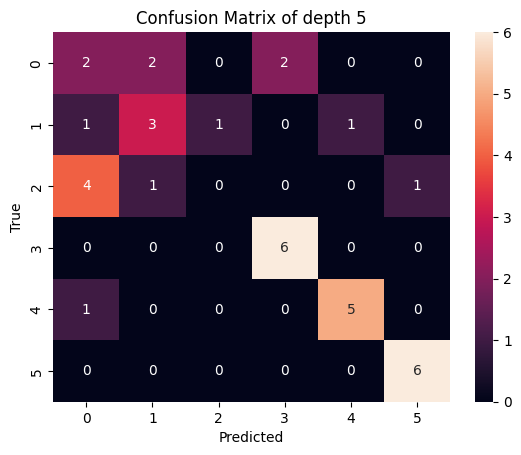

The accuracy of the Decision Tree of depth 6 is 0.5833333333333334


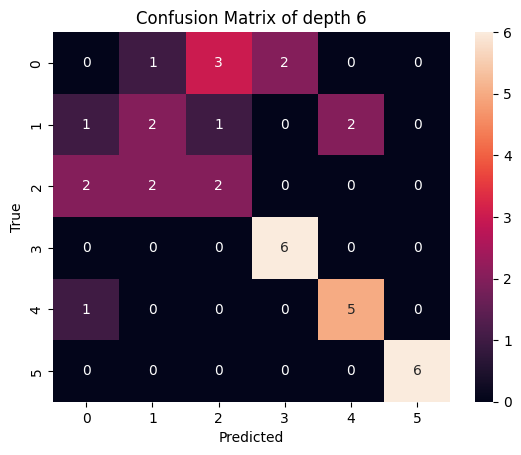

The accuracy of the Decision Tree of depth 7 is 0.5833333333333334


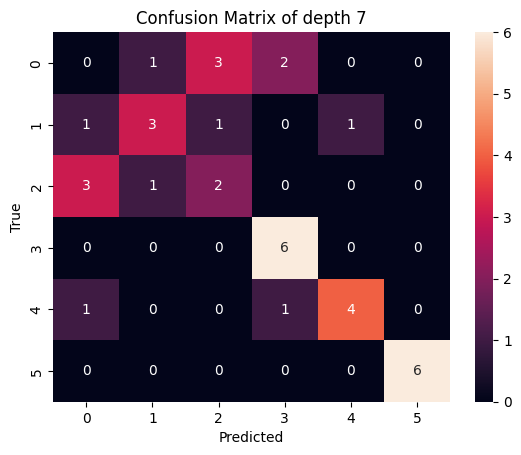

The accuracy of the Decision Tree of depth 8 is 0.5833333333333334


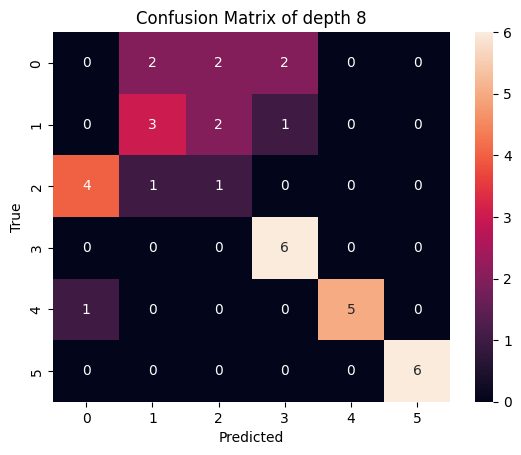

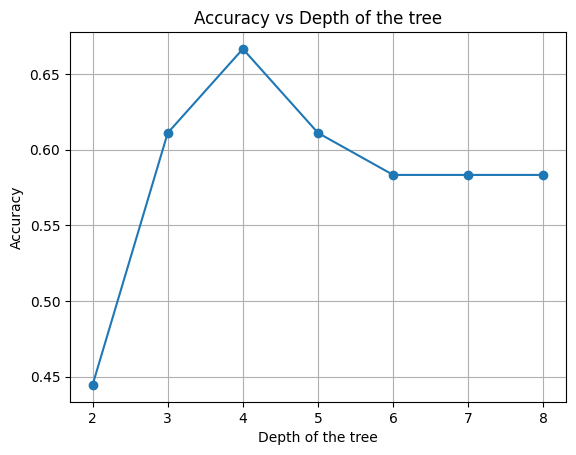

In [8]:
accuracies = []

for i in range(2, 9):
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train_2d, y_train)
    y_pred = model.predict(X_test_2d)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"The accuracy of the Decision Tree of depth {i} is {accuracy}")
    conf_matrix = confusion_matrix(y_test, y_pred)  
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix of depth {i}')
    plt.show()

plt.plot(np.arange(2, 9), accuracies, marker='o')
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth of the tree")
plt.grid()

Yes, the accuracy changes when we increase the depth of the decision tree. Initial increment results in a better accuracy but after a sufficient depth, there is no considerable improvement in the accuracy and the toil going into more calculations has diminishing returns and is not feasible. Overfitting also harms our prediction accuracy, lowering it at times.

Question 5

In [9]:
X_train_linear = np.sum(X_train**2, axis = 2)
X_train_linear_df = pd.DataFrame(X_train_linear)
X_train_linear_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.061579,1.068788,1.076640,1.081619,1.083677,1.089191,1.088519,1.077718,1.072226,1.073787,...,1.065313,1.069200,1.072072,1.072758,1.069753,1.067005,1.067372,1.070067,1.071565,1.065639
1,1.094193,1.105745,1.100355,1.088352,1.073085,1.064589,1.070972,1.072502,1.076323,1.085273,...,1.071004,1.072441,1.074535,1.066675,1.063528,1.065388,1.066096,1.067130,1.071679,1.077976
2,0.737070,0.742623,0.612213,0.611427,0.618866,0.576885,0.663982,0.715187,0.761910,0.818487,...,0.715990,0.735479,0.709034,0.721843,0.720080,0.607252,0.565186,0.529487,0.528832,0.512845
3,2.330978,2.364194,2.285008,1.995089,1.486505,0.885626,0.609474,0.559679,0.520461,0.465431,...,0.496868,0.526072,0.593439,0.797267,1.059548,1.047754,1.088295,1.385482,1.619239,1.388138
4,1.045221,1.049030,1.053342,1.063177,1.059419,1.052925,1.058818,1.050844,1.043341,1.047368,...,1.053456,1.042352,1.038869,1.047991,1.053762,1.052498,1.050367,1.048974,1.050502,1.046420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.500916,0.606063,0.564021,0.562212,0.463815,0.469947,0.583276,0.670271,0.795946,0.760122,...,0.480198,0.635296,0.753394,0.837983,1.269750,2.453684,3.150181,2.569922,2.442537,2.661125
104,1.667010,1.683330,1.400401,1.398746,1.443760,1.429334,1.422312,1.272041,1.266330,1.635466,...,0.556597,0.625043,0.718228,0.822178,0.822011,0.734799,0.777650,0.816605,0.869754,1.036154
105,1.068699,1.074914,1.072772,1.067998,1.060452,1.060050,1.068315,1.065193,1.064904,1.071375,...,1.071639,1.072648,1.073712,1.070341,1.070436,1.070280,1.060376,1.053773,1.053341,1.059201
106,2.437082,2.287970,1.472244,0.668358,0.561077,0.932713,1.170589,1.235397,1.133492,0.844032,...,1.284310,1.342955,1.152644,1.066167,0.971577,0.797153,0.791073,0.748641,0.629820,0.552444


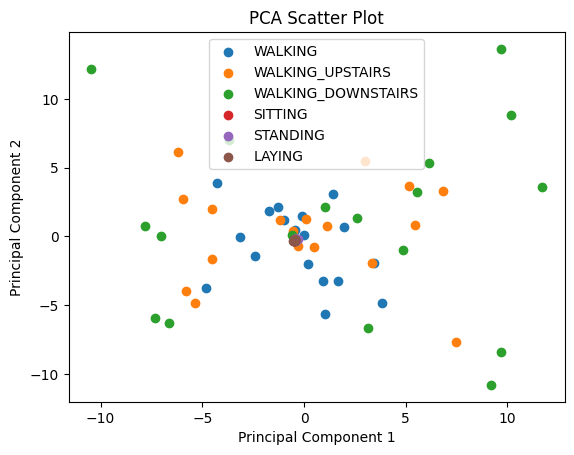

In [10]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_linear_df)
X_train_linear_df_reduced = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

data_pca = pd.concat([X_train_linear_df_reduced, pd.DataFrame(y_train, columns=['Activity'])], axis = 1)

for i in range(6):
    X = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC1']
    Y = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC2']
    plt.scatter(X,Y, label = list(classes.keys())[i])

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [11]:
cfg = tsfel.get_features_by_domain()
X_train_featurised = np.empty((108, 777))
for i in range(len(X_train)):
    X = tsfel.time_series_features_extractor(cfg, X_train[i], fs = 50, window_size = 250)
    X_train_featurised[i] = np.array(X.head(1)).reshape(X.head(1).shape[1])

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [12]:
X_train_featurised_df = pd.DataFrame(X_train_featurised)

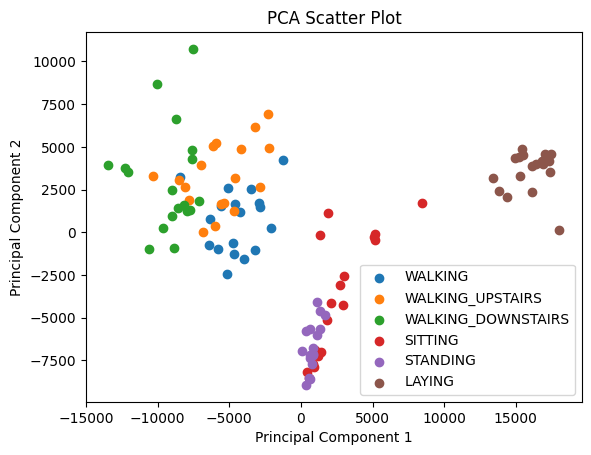

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_featurised_df)
X_train_featurised_df_reduced = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

data_pca = pd.concat([X_train_featurised_df_reduced, pd.DataFrame(y_train, columns=['Activity'])], axis = 1)

for i in range(6):
    X = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC1']
    Y = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC2']
    plt.scatter(X,Y, label = list(classes.keys())[i])

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Yes, we can observe considerable difference in the scatterplots of the two cases. Before featurising and performing PCA, the scatter plot couldn’t show clear classification between the activities. However, after featurising and performing PCA, the scatterplot had a much more grouped activity data and a comparatively better visual classification.

Question 6

In [14]:
cfg = tsfel.get_features_by_domain()
X_test_featurised = np.empty((len(X_test), 777))
for i in range(len(X_test)):
    X = tsfel.time_series_features_extractor(cfg, X_test[i], fs = 50, window_size = 250)
    X_test_featurised[i] = np.array(X.head(1)).reshape(X.head(1).shape[1])

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


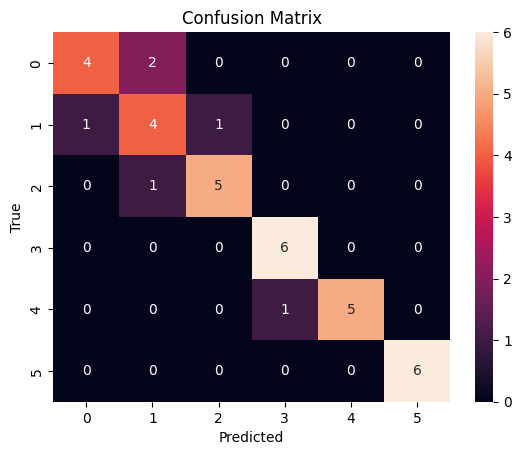

0.5833333333333334

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train_featurised, y_train)
y_pred = model.predict(X_test_featurised)
accuracy_1 = accuracy_score(y_test, y_pred)
conf_matrix_1 = confusion_matrix(y_test, y_pred)
accuracy, conf_matrix_1
sns.heatmap(conf_matrix_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
accuracy

The accuracy of the Decision Tree of depth 2 is 0.5


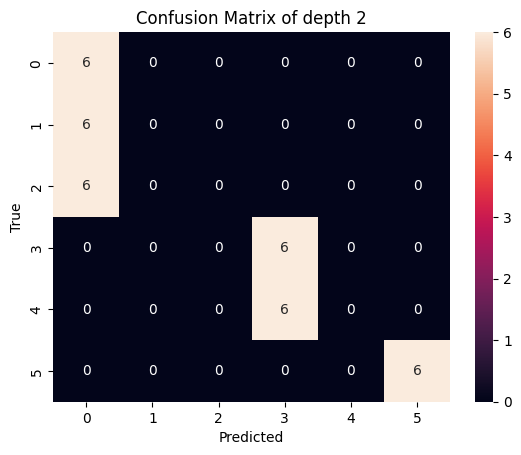

The accuracy of the Decision Tree of depth 3 is 0.75


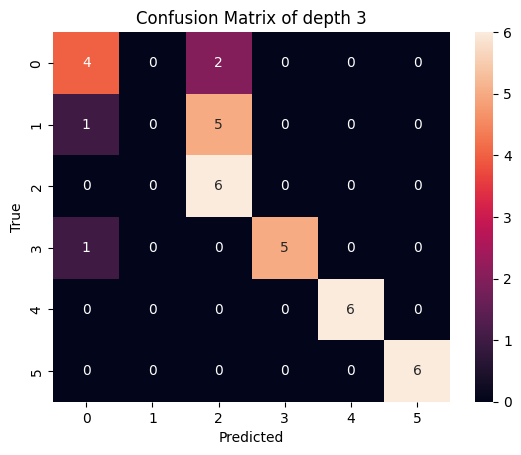

The accuracy of the Decision Tree of depth 4 is 0.8611111111111112


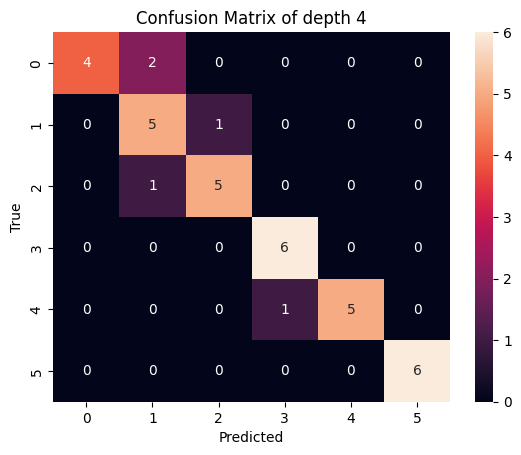

The accuracy of the Decision Tree of depth 5 is 0.8611111111111112


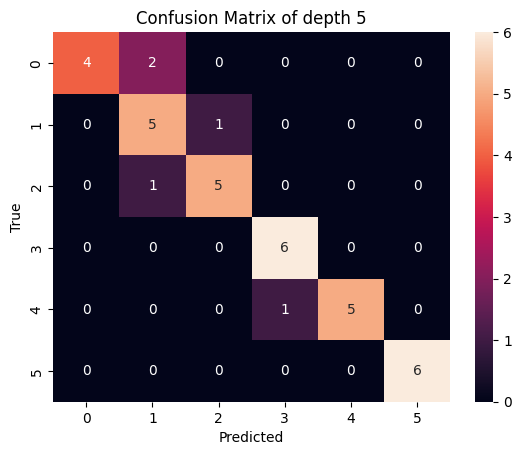

The accuracy of the Decision Tree of depth 6 is 0.8055555555555556


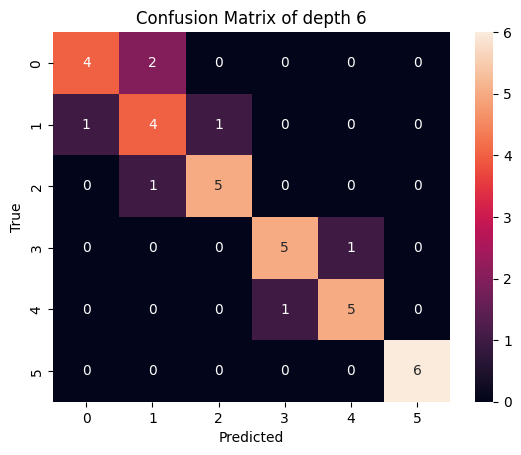

The accuracy of the Decision Tree of depth 7 is 0.8611111111111112


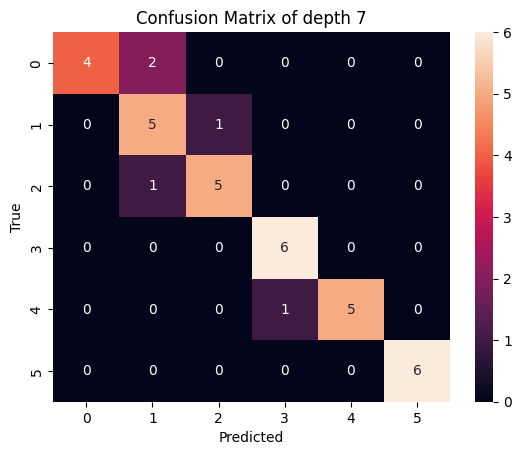

The accuracy of the Decision Tree of depth 8 is 0.8611111111111112


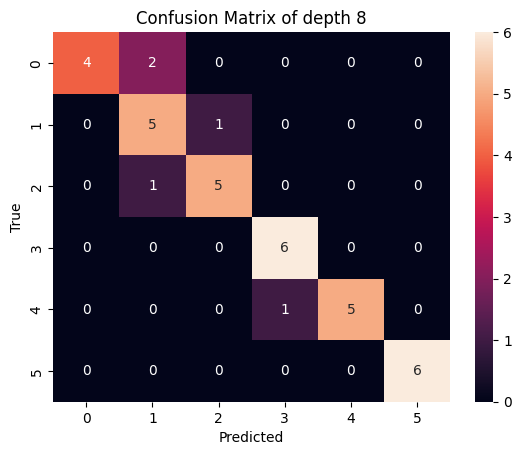

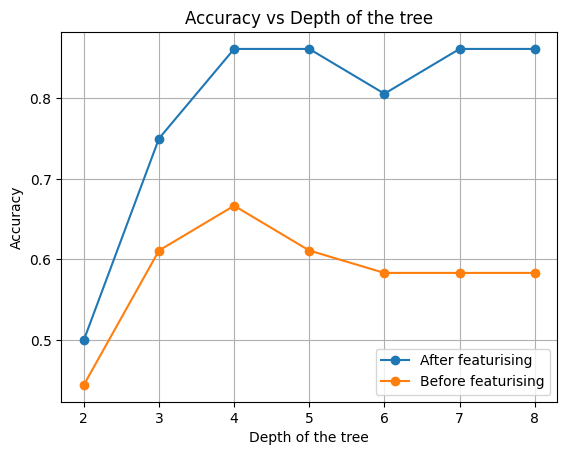

In [16]:
accuracies_featurised = []

for i in range(2, 9):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train_featurised, y_train)
    y_pred = model.predict(X_test_featurised)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_featurised.append(accuracy)
    print(f"The accuracy of the Decision Tree of depth {i} is {accuracy}")
    conf_matrix = confusion_matrix(y_test, y_pred)  
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix of depth {i}')
    plt.show()

plt.plot(np.arange(2, 9), accuracies_featurised, marker='o', label='After featurising')
plt.plot(np.arange(2, 9), accuracies, marker='o', label='Before featurising')
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth of the tree")
plt.legend()
plt.grid()

Definitely, featurising the data provides a much better accuracy than implementing the decision tree directly on the raw data. Even for greater depths of the tree, featurised data provides optimal accuracy whereas raw data seems to fall-off.

**Question 7**

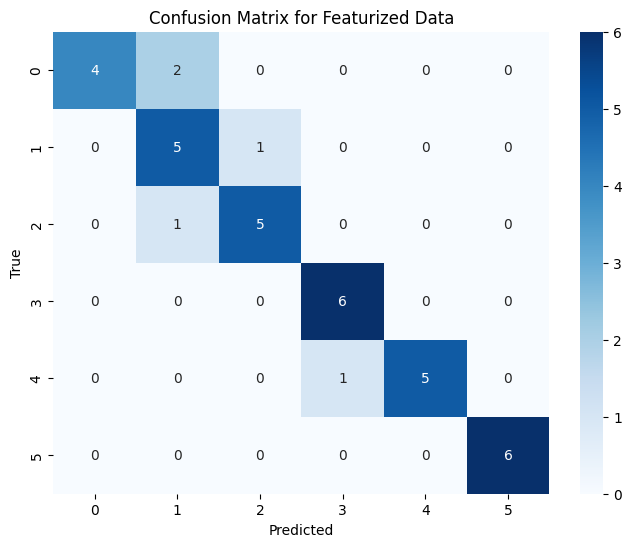

Accuracy for participant 1: 0.6666666666666666
Accuracy score for activity WALKING: 0.6666666666666666
Accuracy for participant 2: 0.8333333333333334
Accuracy score for activity WALKING_UPSTAIRS: 0.8333333333333334
Accuracy for participant 3: 0.8333333333333334
Accuracy score for activity WALKING_DOWNSTAIRS: 0.8333333333333334
Accuracy for participant 4: 1.0
Accuracy score for activity SITTING: 1.0
Accuracy for participant 5: 0.8333333333333334
Accuracy score for activity STANDING: 0.8333333333333334
Accuracy for participant 6: 1.0
Accuracy score for activity LAYING: 1.0


In [17]:
conf_matrix_featurized = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_featurized, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Featurized Data')
plt.show()

# Identify participants/activities with poor performance
bad_participants_featurized = []
bad_activities_featurized = []

def get_key(my_dict, target_value):
    found_key = None
    for key, value in my_dict.items():
        if value == target_value:
            found_key = key
            break
    return found_key

for i in np.unique(y_test):
    X_participant_featurized = X_test_featurised[y_test == i]
    y_participant_featurized = y_test[y_test == i]
    y_pred_participant_featurized = y_pred[y_test == i]
    accuracy_participant_featurized = accuracy_score(y_participant_featurized, y_pred_participant_featurized)
    print(f"Accuracy for participant {i}: {accuracy_participant_featurized}")


    activities_featurized = np.unique(y_participant_featurized)
    for activity in activities_featurized:
        accuracy_activity_featurized = accuracy_score(y_participant_featurized[y_participant_featurized == activity],
                                                      y_pred_participant_featurized[y_participant_featurized == activity])
        print(f"Accuracy score for activity {get_key(classes, activity)}: {accuracy_activity_featurized}")


**Deployment**

In [18]:
X_deploy=[]
y_deploy=[]
deploy_dir = os.path.join("Deployment")

folders_deploy = ["Walking","Sitting", "Standing", "Laying","ClimbingUp","ClimbingDown"]
classes_deploy = {"Walking": 1, "Standing": 5, "Sitting": 4, "Laying": 6, "ClimbingUp": 2, "ClimbingDown": 3}

test_dir = os.path.join(deploy_dir,"Test")

for folder in folders_deploy:
    files_new = os.listdir(os.path.join(test_dir,folder))
    for file in files_new:
        df = pd.read_csv(os.path.join(test_dir,folder,file),sep=",",header=0)
        rows = df.iloc[600:2600:4, 1:4]
        X_deploy.append(rows.values)
        y_deploy.append(classes_deploy[folder])

X_deploy = np.array(X_deploy)
y_deploy = np.array(y_deploy)

X_collected_featurised = np.empty((len(X_deploy), 777))
for i in range(len(X_deploy)):
    X = tsfel.time_series_features_extractor(cfg, X_deploy[i], fs=50, window_size=250)
    X_collected_featurised[i] = np.array(X.head(1)).reshape(X.head(1).shape[1])
# X_collected_featurized = tsfel.time_series_features_extractor(cfg, X_deploy, fs=50, window_size=250)

y_pred_collected_featurized = model.predict(X_collected_featurised)
# print(y_pred_collected_featurized)

accuracy_collected_featurized = accuracy_score(y_deploy, y_pred_collected_featurized)
conf_matrix_collected_featurized = confusion_matrix(y_deploy, y_pred_collected_featurized)

print("Accuracy (Featurized Data):", accuracy_collected_featurized)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix featurized')
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Deployment\\Test\\Standing'